# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

### 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [5]:
from gensim.models import KeyedVectors

# gensimでバイナリファイルをロード
model = KeyedVectors.load_word2vec_format("./GoogleNews-vectors-negative300.bin", binary=True)
# キーに対応する単語ベクトルを表示
model["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

### 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [2]:
# キーとキーの類似度を出力
model.similarity("United_States", "U.S.")

0.73107743

### 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [3]:
# 指定キーとコサイン類似度が高いものを10個まで出力
model.most_similar("United_States", topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

### 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [4]:
# 単語ベクトルの演算を行う
model.most_similar(positive=["Spain", "Athens"], negative=["Madrid"], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

### 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [9]:
import pandas as pd
from tqdm import tqdm

# pandasでテキストファイルをロード
with open("questions-words.txt", encoding='utf-8') as f:
    lines = f.read().split("\n")
    
with open("questions-words2.txt", mode="w", encoding='utf-8') as f:
    for line in tqdm(lines):
        if line == "" or line[0]==':':
            f.write(f'{line}\n')
            continue
        row = line.split(" ")
        word, similarity = model.most_similar(positive=[row[1], row[2]], negative=[row[0]], topn=1)[0]
        f.write(f'{row[0]} {row[1]} {row[2]} {row[3]} {word} {similarity}\n')

100%|██████████| 19559/19559 [52:44<00:00,  6.18it/s]


## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [9]:
with open('./questions-words2.txt', encoding='utf-8') as f:
    lines = f.read().split('\n')

gram_flag = False
sem_cnt = 0
sem_cor = 0
syn_cnt = 0
syn_cor = 0
for line in lines:
    if line == '':
        continue

    if line[0] == ':' and 'gram' in line:
        gram_flag = True
    elif line[0] == ':' and not 'gram' in line:
        gram_flag = False
    else:
        line = line.split(' ')
        # 文法的アナロジーを計算するモード
        if gram_flag == True:
            syn_cnt += 1
            if line[3] == line[4]:
                syn_cor += 1
        # 意味的アナロジーを計算するモード
        else:
            sem_cnt += 1
            if line[3] == line[4]:
                sem_cor += 1

print(f'意味的アナロジー正解率: {sem_cor/sem_cnt}')
print(f'文法的アナロジー正解率: {syn_cor/syn_cnt}')

意味的アナロジー正解率: 0.7308602999210734
文法的アナロジー正解率: 0.7400468384074942


## 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [20]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr

# 評価データのロード
combined = pd.read_csv("./wordsim353/combined.csv")
vecs = []
humans = []

# 単語の類似度を単語とともに辞書に格納
for word1, word2,human  in zip(combined["Word 1"], combined["Word 2"], combined['Human (mean)']):
    vecs.append([word1, word2, model.similarity(word1, word2)])
    humans.append([word1, word2, human])
# 類似度で降順にソートし出力
vecs = sorted(vecs, reverse=True, key=lambda x: x[2])
humans = sorted(humans, reverse=True, key=lambda x: x[2])

correlation, _ = spearmanr([i for _, _, i in vecs], [i for _, _, i in humans])
print(f'スピアマン相関係数 : {correlation}')

スピアマン相関係数 : 0.9999828128046265


## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ

In [21]:
# 国名データの取得
with open("questions-words2.txt", encoding='utf-8') as f:
    lines = f.read().split("\n")
    
flag = False
countries = []
for line in lines:
    if line == "":
        continue
    if line[0] == ":":
        _, theme = line.split(" ")
        if theme == "capital-world" or theme == "capital-common-countries":
            flag = True
            continue
        else:
            flag = False
    if flag == True:
        countries.append(line.split(" ")[1])

# 国名のリスト
countries = list(set(countries))
# 国名のベクトルのリスト
countries_vec = [model[country] for country in countries]

In [22]:
from sklearn.cluster import KMeans

# k-means法で学習
kmeans = KMeans(n_clusters=5, max_iter=1000)
pred = kmeans.fit_predict(countries_vec)

# DataFrameに変換し可視化
df = pd.DataFrame({"class_id":pred, "country":countries})
df = df.sort_values("class_id").reset_index(drop=True) # DataFrameのインデックスをリセット
df

,class_id,country
0,0,Uzbekistan
1,0,Syria
2,0,Turkmenistan
3,0,Bhutan
4,0,China
...,...,...
111,4,Montenegro
112,4,Macedonia
113,4,Greece
114,4,Georgia


## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

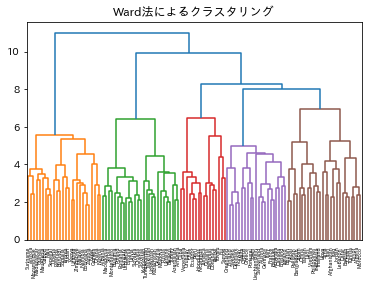

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import japanize_matplotlib

# 階層型クラスタリングで学習
cluster = linkage(countries_vec, method="ward", metric="euclidean")
dendrogram(cluster, labels=countries)

# 図示
plt.title("Ward法によるクラスタリング")
plt.show()

## 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．
(t-SNEは次元削減アルゴリズム)

D:\base\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\base\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


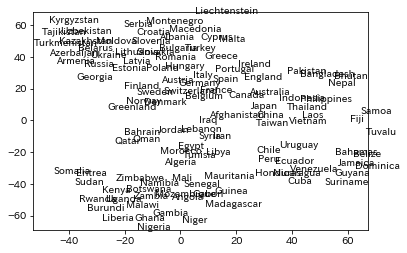

In [25]:
from sklearn.manifold import TSNE

# t-SNEで次元圧縮
tsne = TSNE(n_components = 2)
X = tsne.fit_transform(countries_vec)

# グラフの作成
plt.xlim(X[:, 0].min(), X[:, 0].max() + 1)
plt.ylim(X[:, 1].min(), X[:, 1].max() + 1)

# 図示
for i in range(len(countries_vec)):
    plt.text(
        X[i, 0],
        X[i, 1],
        str(countries[i]),
        )